# (3.12) Exercise:
1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
3. High level statistics of the dataset: number of points, numer of features, number of classes, data-points per class.
4. Explain our objective.
5. Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
6. Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
7. Write your observations in english as crisply and unambigously as possible. Always quantify your results.

## Exploratory data analysis on Heberman's Survival dataset
### About the dataset:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
### Attributes:
1. Age: Patient's age at time of operation
2. Year: Year of operation
3. Number of lymph node
4. Survival status: 1 for patient survived 5 years or longer 2 for patient died within 5 years.


## Data loading and cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read the data into a dataframe
df=pd.read_csv("C:\\Users\\poonam\\Desktop\\FIU\\Applied AI Course\\Cancer Survival Dataset\\haberman.csv")

In [3]:
# Print out the first couple of rows of the dataframe
df[:5]

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Quick Checks

In [4]:
# Print out the total no of rows and columns in dataset
print(df.shape)

(306, 4)


In [5]:
# Print out the column names in dataset.
print(df.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [6]:
# Print out the types od columns
df.dtypes

age       int64
year      int64
nodes     int64
status    int64
dtype: object

In [7]:
# Print out the descriptive statistics of numeric values.
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### Observations:
    1. Minimum age of patient during operation is 30 and maximum age is 83.
    2. Year field range from 58 to 69.
    3. According to the dataset attribute information, This contains the no of lymph nodes. From this check we found that minimum value for lymph node is 0 and maximum values is 52.
    4. Status of patient(survived/died) - Here we can see only two values 1 and 2.

In [8]:
# Check out if there are any null values in the dataset
df.isnull().values.any()

False

In [9]:
# If missing values exists check out where the missing values occur
df.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

#### This dataset does not contain any missing value.

In [10]:
# change the value of status attribute
df['status']=df['status'].map({1:'survived',2:'died'})
df[:5]

,age,year,nodes,status
0,30,64,1,survived
1,30,62,3,survived
2,30,65,0,survived
3,31,59,2,survived
4,31,65,4,survived


In [11]:
df['status'].value_counts()

survived    225
died         81
Name: status, dtype: int64

#### Dataset is a imbalanced dataset because number of datapoints are not equal.

## Objective: 
Classify a new patient who had undergone breast cancer surgery as belonging to one of the 2 classes i.e,( patient will survive more than 5 years or die within 5 years) based on the 3 features (age, year, nodes).

## Univaraite analysis:
### 1. Histogram:
Seaborn distplot plots a univariate distribution of observations. The distplot() function combines the matplotlib hist function with the seaborn kdeplot() and rugplot() functions.
Seaborn distplot show a histogram with a line on it.

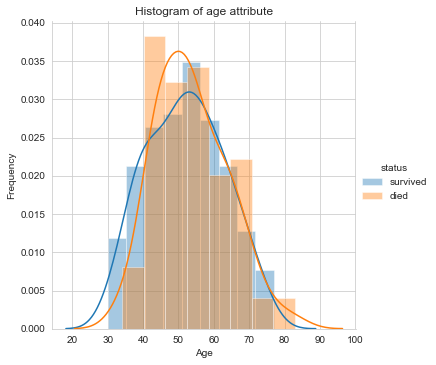

In [12]:
# Univariate analysis on the age attribute
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('Histogram of age attribute')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show();

#### Patient with age 30-34 have survived more than 5 years and patient with age 77-83 have died within 5 years.

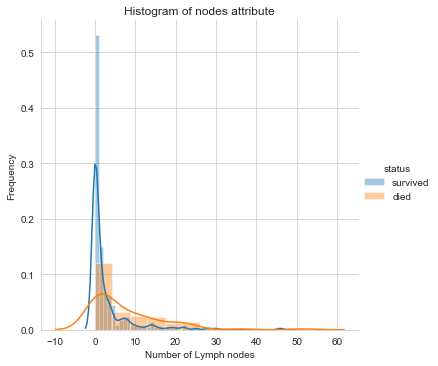

In [13]:
# Univariate analysis on the node attribute
sns.FacetGrid(df, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title('Histogram of nodes attribute')
plt.xlabel('Number of Lymph nodes')
plt.ylabel('Frequency')
plt.show();

#### Patient with less number of lymph modes have survived more than 5 years. 

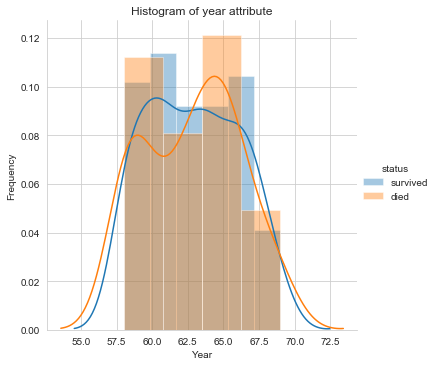

In [14]:
# Univariate analysis on the year attribute
sns.FacetGrid(df, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title('Histogram of year attribute')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show();

#### As we see distriution is overlapping, we cannot conclude anything. 

### 2. PDF (Probability distribution function)  and CDF (Cumulative distribution function):
PDF: Total % of distribution of data at one particular point. 
CDF: Total % of distribution of data below all points.

In [15]:
df_survived=df.loc[df["status"] == "survived"];
df_died=df.loc[df["status"] == "died"];
df_died[:5]

,age,year,nodes,status
7,34,59,0,died
8,34,66,9,died
24,38,69,21,died
34,39,66,0,died
43,41,60,23,died


[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


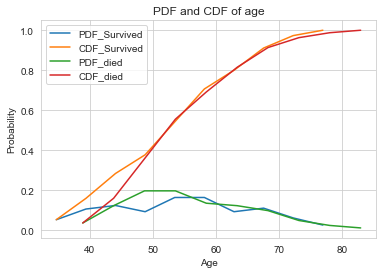

In [16]:
# Plot PDF and CDF for the age attribute who survived

counts, bin_edges = np.histogram(df_survived['age'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF_Survived');
plt.plot(bin_edges[1:], cdf,label='CDF_Survived')

# Plot PDF and CDF for the age attribute who died

counts, bin_edges = np.histogram(df_died['age'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF_died');
plt.plot(bin_edges[1:], cdf,label='CDF_died')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('PDF and CDF of age')
plt.legend()
plt.show()

#### Based on PDF, patients with age 44 to 55 have died more than survived.
#### Based on CDF, patients with age less than 48 has more probability of survival than probability of dying  
#### Age not seems to be much useful in classifying the patient as both PDF and CDF are overlapping

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


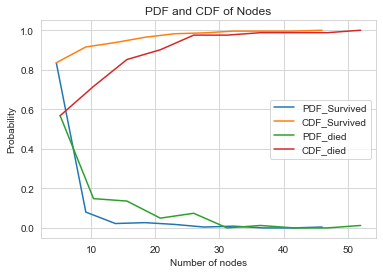

In [17]:
# Plot PDF and CDF for the nodes attribute who survived

counts, bin_edges = np.histogram(df_survived['nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF_Survived');
plt.plot(bin_edges[1:], cdf,label='CDF_Survived')

# Plot PDF and CDF for the nodes attribute who died

counts, bin_edges = np.histogram(df_died['nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF_died');
plt.plot(bin_edges[1:], cdf,label='CDF_died')

plt.xlabel('Number of nodes')
plt.ylabel('Probability')
plt.title('PDF and CDF of Nodes')
plt.legend()
plt.show()

#### Based on CDF Survived, 82% of the patients who have less number of lymps nodes have more chances of survival.
#### Based on CDF died, Patient who have mora than 46 lymps node have no chance of survival more than 5 years.

### 3. Box Plot:
A box plot is a useful way to see the central tendency, variability, and skewness of a distribution and also an excellent way to detect outliers and extreme values. Box-plot can be visualized as a PDF on the side-ways.

1. Box represents the interquartile range(IQR)
2. Top line in the box is the 75th percentile(3rd quartile)
3. Center line in the box is the 50th percentile(median).
4. Bottom line in the box is the 25th percentile(1st quartile)
5. Whiskers extend from the box to the left and right.
6. The left and right fences represent the minimum and maximum value.

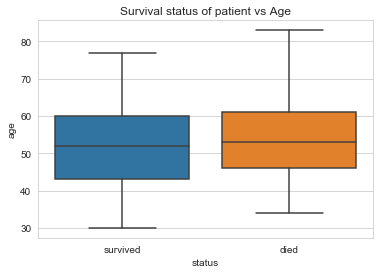

In [18]:
# Box plot for attribute age
sns.boxplot(x='status',y='age', data=df)
plt.title('Survival status of patient vs Age')
plt.show()

#### 50% of patients age who survived more than 5 years are ranges from 43 to 60 (IQR)
#### 50% of patient's age who died within 5 years are ranges from 46 to 61 (IQR)

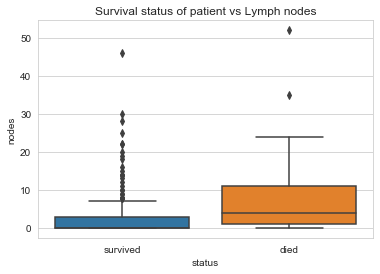

In [19]:
# Box plot for attribute nodes
sns.boxplot(x='status',y='nodes', data=df)
plt.title('Survival status of patient vs Lymph nodes')
plt.show()

#### From the box plot we found that only 25% of the patients having positive nodes overlapped for both survival status. Hence, nodes seems to be much useful in classifying the patient's survival status than other features.

### 4. Violin Plots:
A violin plot combines the benefits of the previous two plots and simplifies them.
Denser regions of the data are fatter, and sparser ones thinner in a violin plot


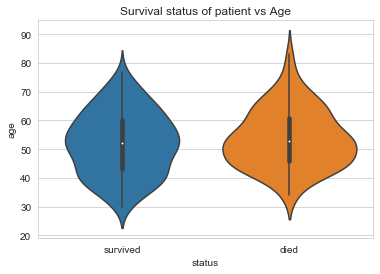

In [20]:
sns.violinplot(x="status", y="age", data=df, size=8)
plt.title('Survival status of patient vs Age')
plt.show()

#### Age of patient who dies within 5 years is highly densed between 45 and 55.

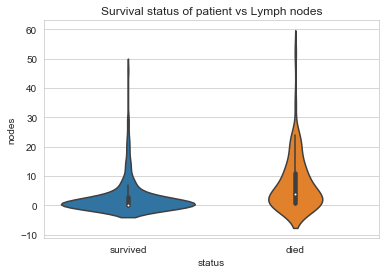

In [21]:
sns.violinplot(x="status", y="nodes", data=df, size=8)
plt.title('Survival status of patient vs Lymph nodes')
plt.show()

#### lymph nodes between 0 to 2 is highly densed. Seems patient who have less nodes have more chances of survival. 

## Bivariate Analysis:
### 1. Scatter Plot:

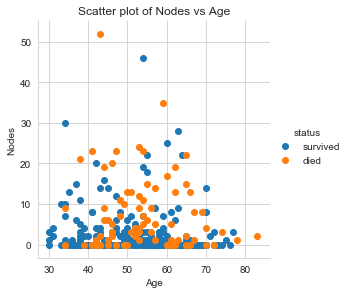

In [22]:
sns.FacetGrid(df, hue="status", size=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title("Scatter plot of Nodes vs Age")
plt.xlabel("Age")
plt.ylabel("Nodes")
plt.show();

#### We cannot get useful information as points are overlapping.  

### 2. Pair Plot:
Pair plot shows the relationship between all combination of attributes.

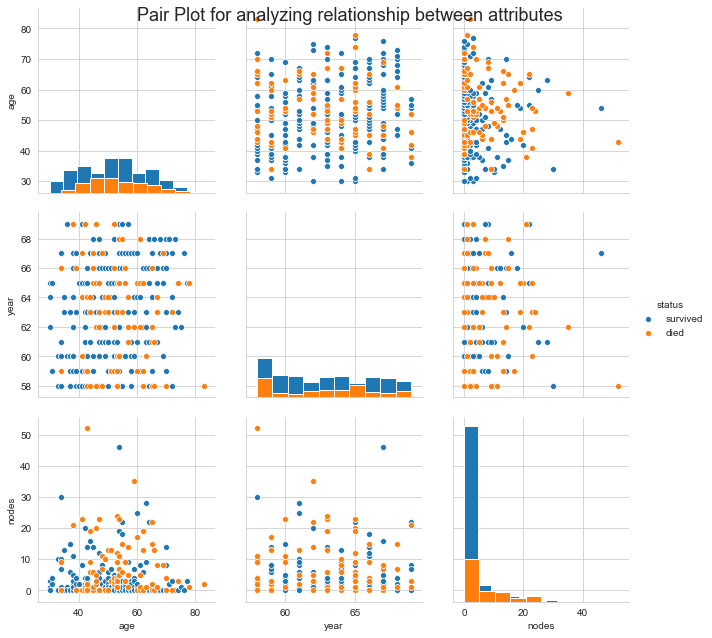

In [23]:
sns.pairplot(df, hue ="status", diag_kind = "hist", height = 3)
plt.suptitle('Pair Plot for analyzing relationship between attributes',size=18), 
plt.show()

#### In all the combinations, there is so much overlapping thus no plot can be linearly separable and seems not much useful in classifying the patient.

### During our exploratory data analysis, we found out that patient with age 30-34 have survived more than 5 years and patient with age 77-83 have dies within 5 years. We also noticed that patient have less number of lymph nodes have more chances of survival.